<a href="https://colab.research.google.com/github/AnkeethaJha-99/DS_projects/blob/main/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as stats
from sklearn.tree import DecisionTreeClassifier

In [41]:
data = pd.read_csv("/content/Pokemon.csv")

In [4]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [42]:
data.fillna("None")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [43]:
data.drop("#",axis=1,inplace=True)

In [7]:
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [9]:
len(data[data['Generation']==5])

165

In [17]:
data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [12]:
len(data[data['Defense']==data['Defense'].max()])

3

In [21]:
data_ind = data[['Attack','Speed','Generation']]


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


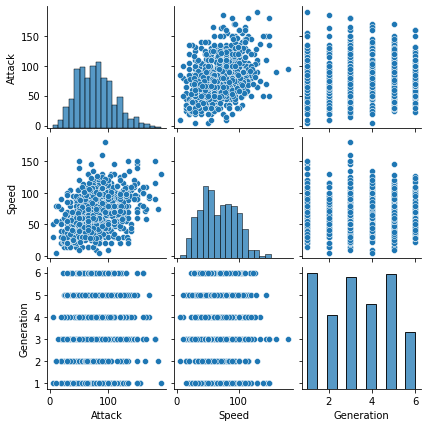

In [22]:
sns.pairplot(data_ind,size=2)               

<Axes: xlabel='Attack', ylabel='Generation'>

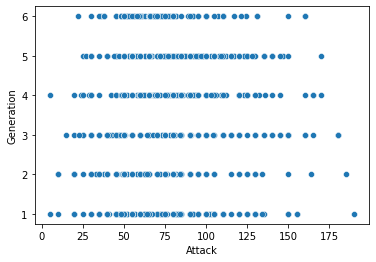

In [27]:
sns.scatterplot(x=data["Attack"],y=data['Generation'],data=data)

<Axes: xlabel='Speed', ylabel='Generation'>

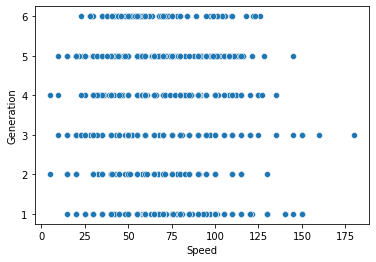

In [25]:
sns.scatterplot(x=data["Speed"],y=data['Generation'],data=data)

In [34]:
np.corrcoef(data['Attack'],data['Generation'])

array([[1.        , 0.05145134],
       [0.05145134, 1.        ]])

In [35]:
np.corrcoef(data['Speed'],data['Generation'])

array([[ 1.        , -0.02312106],
       [-0.02312106,  1.        ]])

In [44]:
data['Legendary']=data['Legendary'].map({False:0,True:1})

In [45]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


In [100]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
data['Type 1']=lb.fit_transform(data['Type 1'])
data['Type 2']=lb.fit_transform(data['Type 2'])


In [101]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,9,13,318,45,49,49,65,65,45,1,0
1,Ivysaur,9,13,405,60,62,63,80,80,60,1,0
2,Venusaur,9,13,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,9,13,625,80,100,123,122,120,80,1,0
4,Charmander,6,18,309,39,52,43,60,50,65,1,0


In [106]:
data.fillna(0)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,9,13,318,45,49,49,65,65,45,1,0
1,Ivysaur,9,13,405,60,62,63,80,80,60,1,0
2,Venusaur,9,13,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,9,13,625,80,100,123,122,120,80,1,0
4,Charmander,6,18,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,15,4,600,50,100,150,100,150,50,6,1
796,DiancieMega Diancie,15,4,700,50,160,110,160,110,110,6,1
797,HoopaHoopa Confined,14,8,600,80,110,60,150,130,70,6,1
798,HoopaHoopa Unbound,14,1,680,80,160,60,170,130,80,6,1


In [108]:
data.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [119]:
from sklearn.model_selection import train_test_split
Y= data['Legendary']
X =  data.drop(['Legendary','Name'],axis=1)
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=0)

In [120]:
train_X=train_x.to_numpy()
train_X.reshape(-1,1).ndim

2

In [121]:
train_X.ndim

2

In [122]:
clf = DecisionTreeClassifier()
clf.fit(train_X,train_y)

DecisionTreeClassifier()

In [124]:
pred_y = clf.predict(test_x)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [125]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(test_y,pred_y)

array([[213,   4],
       [  2,  21]])

In [127]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       217
           1       0.84      0.91      0.87        23

    accuracy                           0.97       240
   macro avg       0.92      0.95      0.93       240
weighted avg       0.98      0.97      0.98       240

